In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Será realizada analize do Dataset referente aos aplicativos disponiveis na loja da do Google Play Store.
O arquivo encontra-se disponivel no endereço: (https://www.kaggle.com/datasets/lava18/google-play-store-apps). 

In [3]:
df = pd.read_csv(r"C:\Users\dougl\OneDrive\Área de Trabalho\Impacta Data Science\estatisticas\exercicio_aula_1\archive\googleplaystore.csv")

**Apos a leitura** e carregamento do arquivo, iremos proceder conforme as demandas verificadas. 

In [4]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [36]:
df.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,6-Jul-18,1,4.1 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,19-Jan-15,Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,25-Jul-18,Varies with device,Varies with device


In [5]:
df.shape

(10841, 13)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 972.6+ KB


***

-Verificacao de campos nulos.

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

É possivel visualizar acima, os dados que apresentão algum tipo de campo nulo. será iniciado o  tratamento apartir destes dados.

In [7]:
df[df["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,7-Mar-18,1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,20-Sep-17,8,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,23-Jul-18,1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,17-Jul-18,1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,8-Aug-17,2,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,31-Jul-18,2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,2-Feb-18,1,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,13-Jun-18,2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,29-Sep-16,1.1.5,4.0 and up


In [8]:
df.dropna(subset=["Rating"],inplace=True)

In [9]:
df[df["Content Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3,"1,000+",Free,0,0,NaN,11-Feb-18,1.0.19,4.0 and up,NaN


In [10]:
df.dropna(subset=["Content Rating"],inplace=True)

As linhas com valores ausentes na coluna 'Rating' e 'Content Rating' foram apagadas.(Precisa melhorar, alteracao realizada em 30/05)

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

Para as colunas'Current Ver' e 'Android Ver', por momento não serao alterados. Caso haja necessidade posterior, sera tratado.

***

-Verificacao de daos duplicados

In [12]:
df.duplicated().value_counts()

False    8892
True      474
dtype: int64

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().value_counts()

False    8892
dtype: int64

Foram deletados 474 linhas duplicadas.

***

Iremos iniciar a analise dos dados

In [17]:
df["Category"].value_counts()

FAMILY                 1718
GAME                   1074
TOOLS                   734
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         310
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       65
ART_AND_DESIGN           62
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

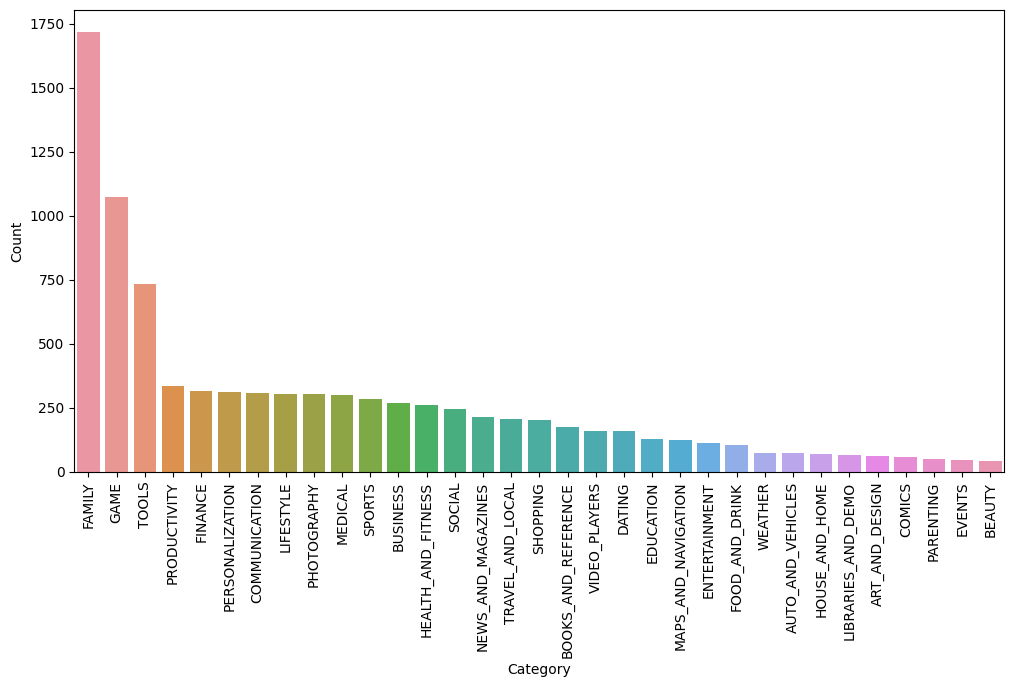

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(x='Category',data=df,order=df.Category.value_counts().index)
plt.xticks(rotation='vertical')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [58]:
Family = df['Category'] =='FAMILY'
df_family = df[Family]

In [66]:
df_family['Reviews'].value_counts()

4          25
7          19
1          16
5          16
13         16
           ..
2931        1
6738        1
306652      1
1450632     1
785         1
Name: Reviews, Length: 1288, dtype: int64

In [62]:
df_family

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Type_2
2014,YouTube Kids,FAMILY,4.5,470694,Varies with device,"50,000,000+",Free,0,Everyone,Entertainment;Music & Video,3-Aug-18,3.43.3,4.1 and up,0
2015,Candy Bomb,FAMILY,4.4,42145,20M,"10,000,000+",Free,0,Everyone,Casual;Brain Games,4-Jul-18,2.9.3181,4.0.3 and up,0
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,31-Jul-18,2.347.225742,4.1 and up,0
2017,Jewels Crush- Match 3 Puzzle,FAMILY,4.4,14774,19M,"1,000,000+",Free,0,Everyone,Casual;Brain Games,23-Jul-18,1.9.3901,4.0.3 and up,0
2018,Coloring & Learn,FAMILY,4.4,12753,51M,"5,000,000+",Free,0,Everyone,Educational;Creativity,17-Jul-18,1.49,4.0.3 and up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,27-Jun-18,3.8.0,4.1 and up,0
10827,Fr Agnel Ambarnath,FAMILY,4.2,117,13M,"5,000+",Free,0,Everyone,Education,13-Jun-18,2.0.20,4.0.3 and up,0
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,18-Jun-17,1.0.0,4.1 and up,0
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,25-Jul-17,1.48,4.1 and up,0


criar coluna binaria apartir de Type

In [53]:
df['Type_2'] = df['Type'].map(lambda x:0 if x =='Free' else 1)

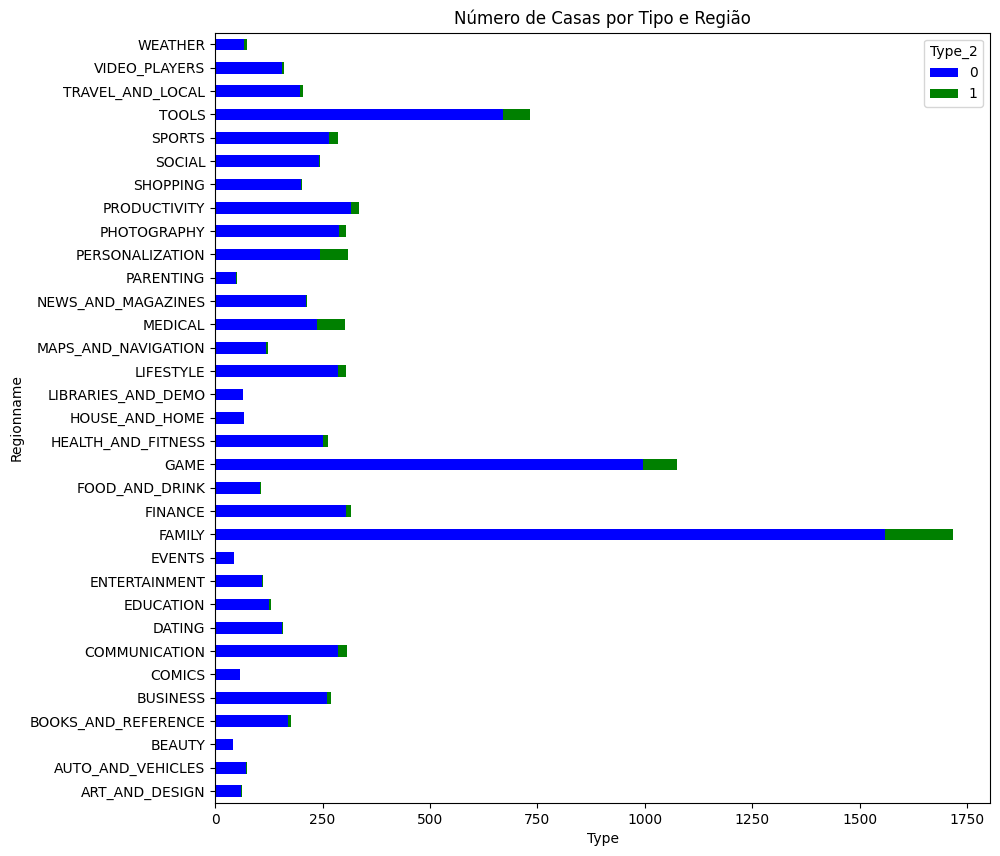

In [57]:
dados_grouped = df.groupby(['Category', 'Type_2',])['Category'].count().unstack()
# ordenando os tipos de imóveis em ordem decrescente de número de casas
dados_grouped = dados_grouped.sort_values(by='Category', ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))
dados_grouped.plot(kind='barh', stacked=True, ax=ax,color=['blue', 'green', 'red'])
ax.set_title('Número de Casas por Tipo e Região')
ax.set_xlabel('Type')
ax.set_ylabel('Regionname')
plt.xticks(rotation = 0)
plt.show()

Os 30 mais são......

In [19]:
#df=df_paid.sort_values('Price',ascending=False)
#top=df.head(30)
#top


Algumas colunas precisarão ser convertidas para podermos realizar analize dos dados()

acho que precisa criar uma coluna binaria com pago e free

precisa retirar o `M` da coluna size, trocar as virgulas por ponto, e retirar $ da coluna price


In [20]:
#df['Installs']=df['Installs'].str.replace("+","")

RATING DE ACORDO COM O TYPE

Nesse ponto o dataset sera dividido entre App 'Free' e 'Paid'.

In [21]:
df["Type"].value_counts()

Free    8279
Paid     613
Name: Type, dtype: int64

<AxesSubplot: ylabel='Type'>

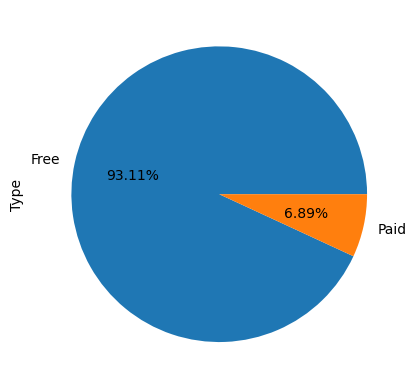

In [22]:
df["Type"].value_counts().plot(kind="pie", autopct="%.2f%%")

In [23]:
free = df['Type'] =='Free'
df_free = df[free]
paid = df['Type'] =='Paid'
df_paid = df[paid]

In [24]:
df_free.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [25]:
df_paid.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,25-Mar-18,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,11-Apr-17,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,$3.99,Everyone,Communication,5-Jul-18,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,$3.99,Mature 17+,Dating,19-Jun-18,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,$6.99,Everyone,Dating,25-Oct-17,1.1.6,4.0 and up


ordenar pela maior category pago e free
coluna comparativa entre as duas
relaciona maior download com a catregoria


In [34]:
df_free.groupby(['Category']).agg({'Category': ['count']}).sort_index(ascending=False)

,Category
,count
Category,
WEATHER,68
VIDEO_PLAYERS,156
TRAVEL_AND_LOCAL,197
TOOLS,671
SPORTS,264
SOCIAL,242
SHOPPING,200
PRODUCTIVITY,316


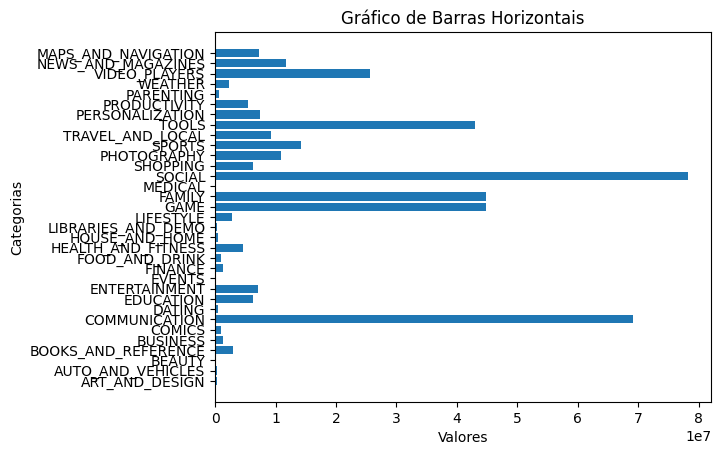

In [27]:
# Atribuição dos dados às variáveis corretas
categorias = df_free['Category']
valores = df_free['Reviews']

# Criação do gráfico de barras horizontais
plt.barh(categorias, valores)

# Configurações adicionais
plt.title('Gráfico de Barras Horizontais')
plt.xlabel('Valores')
plt.ylabel('Categorias')

# Exibição do gráfico
plt.show()


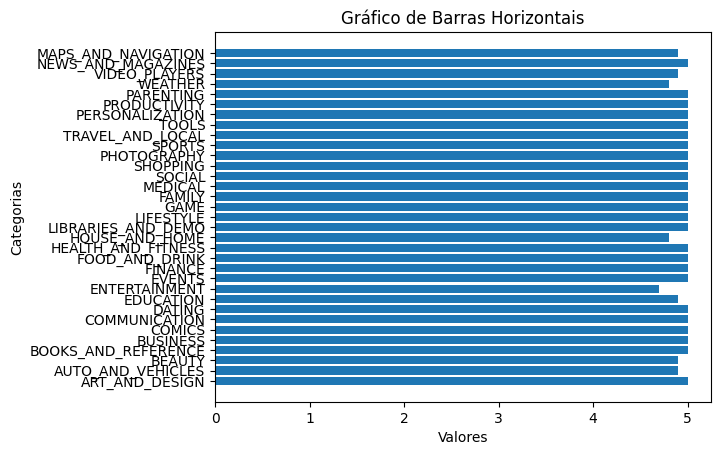

In [28]:
# Atribuição dos dados às variáveis corretas
categorias = df_free['Category']
valores = df_free['Rating']

# Criação do gráfico de barras horizontais
plt.barh(categorias, valores)

# Configurações adicionais
plt.title('Gráfico de Barras Horizontais')
plt.xlabel('Valores')
plt.ylabel('Categorias')

# Exibição do gráfico
plt.show()

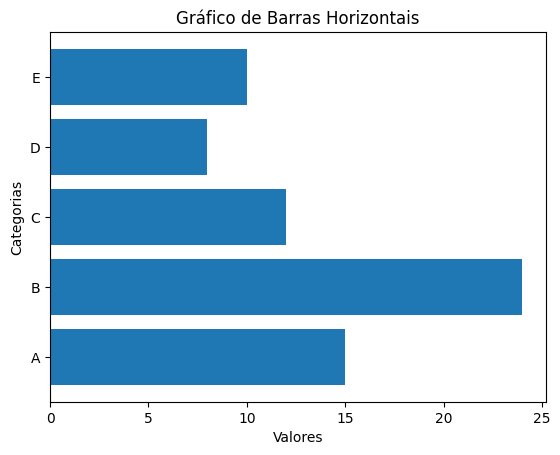

In [29]:
import matplotlib.pyplot as plt

# Dados para o gráfico de barras
categorias = ['A', 'B', 'C', 'D', 'E']
valores = [15, 24, 12, 8, 10]

# Criação do gráfico de barras horizontais
plt.barh(categorias, valores)

# Configurações adicionais
plt.title('Gráfico de Barras Horizontais')
plt.xlabel('Valores')
plt.ylabel('Categorias')

# Exibição do gráfico
plt.show()


In [30]:
df_paid[["Genres"]].value_counts()

Genres                     
Personalization                66
Medical                        64
Tools                          63
Action                         24
Sports                         22
                               ..
Music                           1
Card;Action & Adventure         1
Casino                          1
Casual;Education                1
Books & Reference;Education     1
Length: 67, dtype: int64

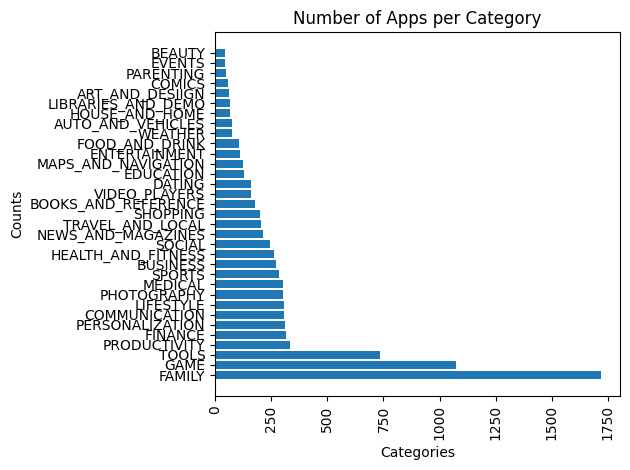

In [31]:
import matplotlib.pyplot as plt

categories = ['FAMILY', 'GAME', 'TOOLS', 'PRODUCTIVITY', 'FINANCE', 'PERSONALIZATION', 'COMMUNICATION',
              'LIFESTYLE', 'PHOTOGRAPHY', 'MEDICAL', 'SPORTS', 'BUSINESS', 'HEALTH_AND_FITNESS', 'SOCIAL',
              'NEWS_AND_MAGAZINES', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'BOOKS_AND_REFERENCE', 'VIDEO_PLAYERS',
              'DATING', 'EDUCATION', 'MAPS_AND_NAVIGATION', 'ENTERTAINMENT', 'FOOD_AND_DRINK', 'WEATHER', 'AUTO_AND_VEHICLES', 'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'ART_AND_DESIIGN', 'COMICS', 'PARENTING',
              'EVENTS', 'BEAUTY']

counts = [1718, 1074, 734, 334, 317, 310, 307, 305, 304, 302, 286, 270, 262, 244, 214, 205, 202, 177, 160, 159,
          129, 124, 111, 106, 75, 73, 68, 65, 62, 58, 50, 45, 42]

plt.barh(categories, counts)
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Number of Apps per Category')

plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para facilitar a leitura

plt.tight_layout()  # Ajusta o espaçamento entre as barras

plt.show()


In [32]:
'''
df.replace({'A': ''}, regex=True, inplace=True)
'''

"\ndf.replace({'A': ''}, regex=True, inplace=True)\n"

usara acima para substituir valores

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8892 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8892 non-null   object 
 1   Category        8892 non-null   object 
 2   Rating          8892 non-null   float64
 3   Reviews         8892 non-null   int64  
 4   Size            8892 non-null   object 
 5   Installs        8892 non-null   object 
 6   Type            8892 non-null   object 
 7   Price           8892 non-null   object 
 8   Content Rating  8892 non-null   object 
 9   Genres          8892 non-null   object 
 10  Last Updated    8892 non-null   object 
 11  Current Ver     8888 non-null   object 
 12  Android Ver     8890 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 972.6+ KB
